In [1]:
import tweepy
import re
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
api_key = #insert API Key
api_secret_key = #Insert API Secret Key
access_token = #Insert Access Token
access_token_secret = #Insert Access Token Secret

In [3]:
auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [4]:
post = api.user_timeline(screen_name = "YonexAllEngland", lang = "en", count = 1000, tweet_mode = "extended")

In [5]:
print("Show the 500 recent tweets : \n")
i = 1
for tweet in post[0:500]:
    print(str(i)+ ')' + tweet.full_text + '\n')
    i = i +1

Show the 500 recent tweets : 

1)It’s the weekend, time to celebrate 🎉 https://t.co/i8Vl1ePd2y

2)Blessing your timeline with some no-look, reverse-shot magic from @Pvsindhu1 😍 https://t.co/298G8jM0Nw

3)You don't stop those 🚫 https://t.co/zN5mxh62V9

4)What. A. Championship. Sunday! 

We hope you enjoyed it as much as we did 🙌 

#YAE2021 https://t.co/IKYjjr2HLD

5)Mixed doubles: Yuta Watanabe and Arisa Higashino 

📸 @badmintonphoto https://t.co/rLfLKnQlty

6)Men's doubles: Hiroyuki Endo and Yuta Watanabe 

📸 @badmintonphoto https://t.co/qQfuG5Alri

7)Women's doubles: Mayu Matsumoto and Wakana Nagahara 

📸 @badmintonphoto https://t.co/tpYWWq9zgh

8)Women's singles: Nozomi Okuhara 

📸 @badmintonphoto https://t.co/6MaB698rs6

9)Your #YAE2021 Champions 🏆 

Men's singles: Lee Zii Jia 

📸 @badmintonphoto https://t.co/U41HSOFGiO

10)Reaction from the mixed doubles winners 🎥 

#YAE2021 https://t.co/MAfJObea0O

11)A finals day to remember for Japan 🇯🇵 

#YAE2021 
📸 @badmintonphoto

12)This is 

In [6]:
df = pd.DataFrame([tweet.full_text for tweet in post], columns = ['Tweets'])
df

Tweets
0    It’s the weekend, time to celebrate 🎉 https://...
1    Blessing your timeline with some no-look, reve...
2       You don't stop those 🚫 https://t.co/zN5mxh62V9
3    What. A. Championship. Sunday! \n\nWe hope you...
4    Mixed doubles: Yuta Watanabe and Arisa Higashi...
..                                                 ...
195  2020 isn’t finished just yet… 🏸 \n\nRead our p...
196  🏆 The YONEX All England Open Badminton Champio...
197  🏆 The YONEX All England Open Badminton Champio...
198  🎖️ Badminton Gold 🎖️\n\nTonight we're taking y...
199  Earlier in the year we launched our 'Never Min...

[200 rows x 1 columns]

In [7]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    
    return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)

df

Tweets
0               It’s the weekend, time to celebrate 🎉 
1    Blessing your timeline with some no-look, reve...
2                              You don't stop those 🚫 
3    What. A. Championship. Sunday! \n\nWe hope you...
4    Mixed doubles: Yuta Watanabe and Arisa Higashi...
..                                                 ...
195  2020 isn’t finished just yet… 🏸 \n\nRead our p...
196  🏆 The YONEX All England Open Badminton Champio...
197  🏆 The YONEX All England Open Badminton Champio...
198  🎖️ Badminton Gold 🎖️\n\nTonight we're taking y...
199  Earlier in the year we launched our 'Never Min...

[200 rows x 1 columns]

In [8]:
def getSubjectivity(text):
    c = str(text)
    return TextBlob(c).sentiment.subjectivity

def getPolarity(text):
    c = str(text)
    return TextBlob(c).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

In [9]:
df

Tweets  Subjectivity  Polarity
0               It’s the weekend, time to celebrate 🎉       0.000000  0.000000
1    Blessing your timeline with some no-look, reve...      1.000000  0.500000
2                              You don't stop those 🚫       0.000000  0.000000
3    What. A. Championship. Sunday! \n\nWe hope you...      0.450000  0.350000
4    Mixed doubles: Yuta Watanabe and Arisa Higashi...      0.250000  0.000000
..                                                 ...           ...       ...
195  2020 isn’t finished just yet… 🏸 \n\nRead our p...      0.000000  0.000000
196  🏆 The YONEX All England Open Badminton Champio...      0.566667  0.233333
197  🏆 The YONEX All England Open Badminton Champio...      0.566667  0.233333
198  🎖️ Badminton Gold 🎖️\n\nTonight we're taking y...      0.275000  0.175000
199  Earlier in the year we launched our 'Never Min...      0.300000  0.033333

[200 rows x 3 columns]

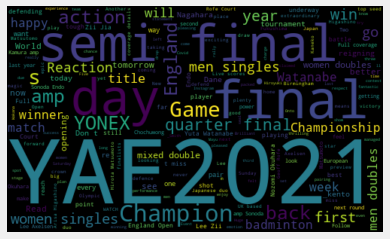

In [10]:
#wordcloud
allwords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allwords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [11]:
def getAnalysis(score):
    if score < 0 :
        return 'Negative'
    elif score == 0 :
        return 'Neutral'
    else :
        return 'Positive'

df['Sentiment'] = df['Polarity'].apply(getAnalysis)

df

Tweets  Subjectivity  \
0               It’s the weekend, time to celebrate 🎉       0.000000   
1    Blessing your timeline with some no-look, reve...      1.000000   
2                              You don't stop those 🚫       0.000000   
3    What. A. Championship. Sunday! \n\nWe hope you...      0.450000   
4    Mixed doubles: Yuta Watanabe and Arisa Higashi...      0.250000   
..                                                 ...           ...   
195  2020 isn’t finished just yet… 🏸 \n\nRead our p...      0.000000   
196  🏆 The YONEX All England Open Badminton Champio...      0.566667   
197  🏆 The YONEX All England Open Badminton Champio...      0.566667   
198  🎖️ Badminton Gold 🎖️\n\nTonight we're taking y...      0.275000   
199  Earlier in the year we launched our 'Never Min...      0.300000   

     Polarity Sentiment  
0    0.000000   Neutral  
1    0.500000  Positive  
2    0.000000   Neutral  
3    0.350000  Positive  
4    0.000000   Neutral  
..        ...       ...  
195  0.000000   Neutral  
196  0.233333  Positive  
197  0.233333  Positive  
198  0.175000  Positive  
199  0.033333  Positive  

[200 rows x 4 columns]

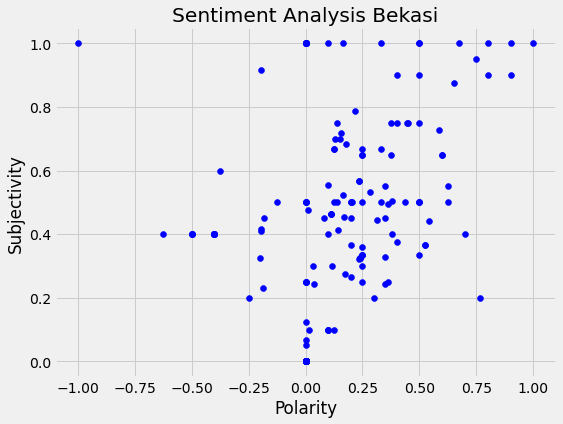

In [12]:
plt.figure(figsize =(8,6))
for i in range (0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title("Sentiment Analysis Bekasi")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

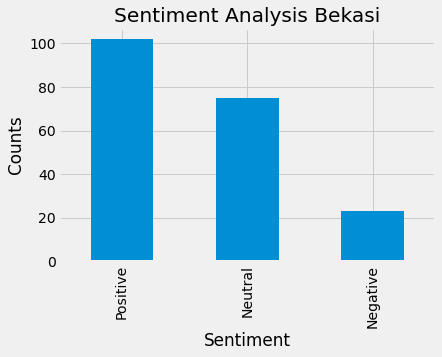

In [13]:
#Plot the sentiment
df['Sentiment'].value_counts()

plt.title("Sentiment Analysis Bekasi")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df['Sentiment'].value_counts().plot(kind = "bar")
plt.show()

In [14]:
#print negative tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'], ascending = 'False')
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Sentiment'][i] == 'Positive'):
        print(str(j)+ ')' + sortedDF['Tweets'][i])
        print()
        j = j+1

1)Blessing your timeline with some no-look, reverse-shot magic from  😍 

2)What. A. Championship. Sunday! 

We hope you enjoyed it as much as we did 🙌 

YAE2021 

3)This is what it means to win your first YONEX All England title 😍 

YAE2021 

4): Tahniah Lee Zii Jia ! The new All England Champ! Awesome performance and  looks like you have found your pace! Keep up the…

5)The men's singles finalists reflect on an incredible battle 💬 

YAE2021 
📸 

6)2021  mixed doubles winners 👏 

Yuta Watanabe and Arisa Higashino win the title once again, having first clinched it in 2018 🙌 

YAE2021 

7)Five years after winning her first  title, Nozomi Okuhara sealed her second.

YAE2021 
📸 

8)2021  women's singles winner 👏 

Nozomi Okuhara clinches the title five years on from her first YONEX All England crown.  

YAE2021 

9)Endo: I have always loved . 

Read more 👉  

10)Only the third men's doubles pairing to win back-to-back championships in the last 25 years 👇 

YAE2021

11)"That is extraordinar